<a href="https://colab.research.google.com/github/CAATKU/Regression/blob/main/Support_Vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
## support vector machine ==> Classification
## support vector regression ==> regression       linear support vector regression 


## Importing the Dataset 

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values 
y = dataset.iloc[:, -1].values 

In [8]:
y = y.reshape(len(y),1)  ##
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [9]:
## Feature Scaling 

"""
1.we don't need to apply feature scaling for linear regression models where
 you have indeed those coefficients that can compensate with the high value of the features..
 these include simple linear regression, multiple linear regressio, polynomial linear regression!!
2. you don't apply feature scaling to some dummy variable resulting from one-hot encoding.
3. when dependent variable take binary values 0 & 1there also you don't need to apply feature scaling.   
  either because values are already in the right range. 
4.when the dependent variable takes super high values with respect to the other features then to put all 
  the features and dependent variable in the same range you need to apply feature scaling.
5. when you split the dataset in train set and test set, there you need to apply feature scaling 
    after splitting the dataset.

** at the end of this implementation you need to also know, which will be the inverse transformation of feature 
scaling.
to make the prediction you need to inverse features scaling transformation.
"""


from sklearn.preprocessing import StandardScaler 

sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)

In [10]:
print('this is X:',X) 
print()
print('this is y:', y)

this is X: [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

this is y: [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [17]:
## Training the SVR model on the whole dataset 

from sklearn.svm import SVR      ## first import the class 
regressor = SVR(kernel='rbf')     ## create an object or insance of this class  here we need to take the parameters kernel = 'rbf
## more on kernel read here 'https://data-flair.training/blogs/svm-kernel-functions/'
regressor.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [14]:
## Predicting the new result 

# regressor.predict(sc_X.transform([[6.5]])) """ remember we apply feature scaling on data so we need to inverse the feature scaling"""

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

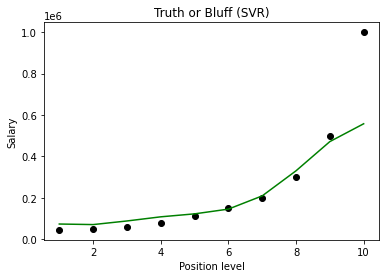

In [15]:
## Visualizing the SVR results 

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='black')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='green')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

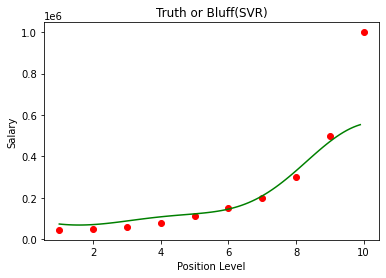

In [16]:
## Visualizing the SVR results (for higher resolution and smoother curve)

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='green')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()